<a href="https://colab.research.google.com/github/marihatabassum/MyMet/blob/main/predicting_the_wind_speed_using_K_Neighbors_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from platform import python_version
print(python_version)

<function python_version at 0x7f6f4cff9750>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime



In [ ]:
with open("/content/drive/MyDrive/Python_Projects/X,Y,time,wind_speed.txt") as f:
    contents = f.readlines()
contents

['X,Y,time,wind_speed\n',
 '11.789999961853,33.1699981689453,42368.1491548843,47\n',
 '11.8199996948242,33.2199974060059,42368.1491666898,50\n',
 '11.8400001525879,33.2700004577637,42368.1491784954,50\n',
 '11.8699998855591,33.3099975585938,42368.1491903125,48\n',
 '11.8999996185303,33.3600006103516,42368.149202118,43\n',
 '11.9499998092651,33.4599990844727,42368.1492257292,38\n',
 '12.0099992752075,33.5499992370605,42368.1492493403,40\n',
 '12.0599994659424,33.6499977111816,42368.1492729629,44\n',
 '12.0900001525879,33.7000007629395,42368.1492847685,45\n',
 '12.1199998855591,33.7399978637695,42368.1492965741,47\n',
 '12.1499996185303,33.7900009155273,42368.1493083796,47\n',
 '12.1700000762939,33.8400001525879,42368.1493201852,49\n',
 '12.1999998092651,33.8899993896484,42368.1493319907,50\n',
 '12.2299995422363,33.9300003051758,42368.1493438078,50\n',
 '12.2599992752075,33.9799995422363,42368.1493556134,50\n',
 '12.289999961853,34.0299987792969,42368.149367419,52\n',
 '12.3099994659424

In [ ]:
read_file = pd.read_csv (r'/content/drive/MyDrive/Python_Projects/X,Y,time,wind_speed.txt')
read_file.to_csv (r'/content/drive/MyDrive/Python_Projects/Wind_speed_data.csv', index=None)


In [ ]:
ws_df=pd.read_csv("/content/drive/MyDrive/Python_Projects/Wind_speed_data.csv")
ws_df

,X,Y,time,wind_speed
0,11.79,33.169998,42368.149155,47.0
1,11.82,33.219997,42368.149167,50.0
2,11.84,33.270000,42368.149178,50.0
3,11.87,33.309998,42368.149190,48.0
4,11.90,33.360001,42368.149202,43.0
...,...,...,...,...
72885,7.02,37.189999,42733.453020,43.0
72886,7.05,37.149998,42733.453032,42.0
72887,7.08,37.099998,42733.453044,39.0
72888,7.11,37.049999,42733.453056,34.0


In [ ]:
ws_df.describe()

,X,Y,time,wind_speed
count,72890.000000,72890.000000,72890.000000,72501.000000
mean,10.034617,38.312631,42544.424142,61.948746
std,6.977896,3.384122,107.806571,32.381322
min,-6.000000,30.439999,42368.149155,0.000000
25%,4.660000,35.959999,42450.441600,39.000000
50%,11.380000,38.279999,42537.127266,58.000000
75%,16.090000,40.809998,42635.268259,82.000000
max,20.000000,45.000000,42733.453068,215.000000


In [ ]:
ws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72890 entries, 0 to 72889
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           72890 non-null  float64
 1   Y           72890 non-null  float64
 2   time        72890 non-null  float64
 3   wind_speed  72501 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


In [ ]:
timestamp=42368.149155
#convert timestamp to datetime object
dt_object=datetime.fromtimestamp(timestamp)
print("dt_object:", dt_object)

dt_object: 1970-01-01 11:46:08.149155


In [ ]:
for i in ws_df["time"]:
  dt_object=datetime.fromtimestamp(i)
  print(dt_object)

Streaming output truncated to the last 5000 lines.
1970-01-01 11:51:49.640824
1970-01-01 11:51:49.640836
1970-01-01 11:51:49.640848
1970-01-01 11:51:49.640860
1970-01-01 11:51:49.640872
1970-01-01 11:51:49.640883
1970-01-01 11:51:49.640895
1970-01-01 11:51:49.640907
1970-01-01 11:51:49.640919
1970-01-01 11:51:49.640931
1970-01-01 11:51:49.640942
1970-01-01 11:51:49.640954
1970-01-01 11:51:49.640966
1970-01-01 11:51:49.640978
1970-01-01 11:51:49.640990
1970-01-01 11:51:49.641001
1970-01-01 11:51:49.641013
1970-01-01 11:51:49.641025
1970-01-01 11:51:49.641037
1970-01-01 11:51:49.641049
1970-01-01 11:51:49.641060
1970-01-01 11:51:49.641072
1970-01-01 11:51:49.641084
1970-01-01 11:51:49.641096
1970-01-01 11:51:49.641108
1970-01-01 11:51:49.641119
1970-01-01 11:51:49.641131
1970-01-01 11:51:49.641143
1970-01-01 11:51:49.641155
1970-01-01 11:51:49.641167
1970-01-01 11:51:49.641178
1970-01-01 11:51:49.641190
1970-01-01 11:51:49.641202
1970-01-01 11:51:49.641214
1970-01-01 11:51:49.641226
1970

In [ ]:
ws_df["Time_Analysis"] =pd.to_datetime(ws_df["time"], unit="s")
ws_df.head()

,X,Y,time,wind_speed,Time_Analysis
0,11.79,33.169998,42368.149155,47.0,1970-01-01 11:46:08.149154884
1,11.82,33.219997,42368.149167,50.0,1970-01-01 11:46:08.149166689
2,11.84,33.270000,42368.149178,50.0,1970-01-01 11:46:08.149178495
3,11.87,33.309998,42368.149190,48.0,1970-01-01 11:46:08.149190312
4,11.90,33.360001,42368.149202,43.0,1970-01-01 11:46:08.149202118


In [ ]:
ws_df.shape

(72890, 5)

In [ ]:
ws_df.isnull().any()

X                False
Y                False
time             False
wind_speed        True
Time_Analysis    False
dtype: bool

In [ ]:
ws_df.wind_speed.isnull().sum()

389

In [ ]:
ws_df=ws_df.dropna(how="any", axis=0)

In [ ]:
ws_df.shape

(72501, 5)

In [ ]:
feature_col=['X', 'Y', 'time']
target=['wind_speed']

In [ ]:
x=ws_df[feature_col]
x.shape

(72501, 3)

In [ ]:
y=ws_df[target]
y.shape

(72501, 1)

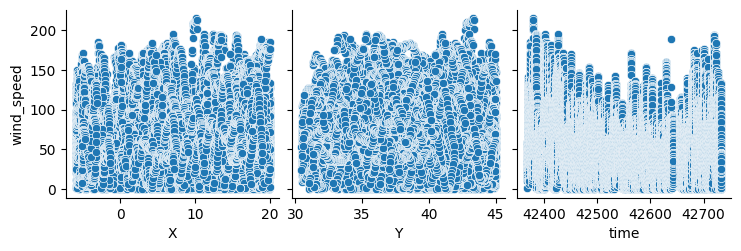

In [ ]:
import seaborn as sns
%matplotlib inline

sns.pairplot(ws_df, x_vars=['X', 'Y', 'time'], y_vars='wind_speed')

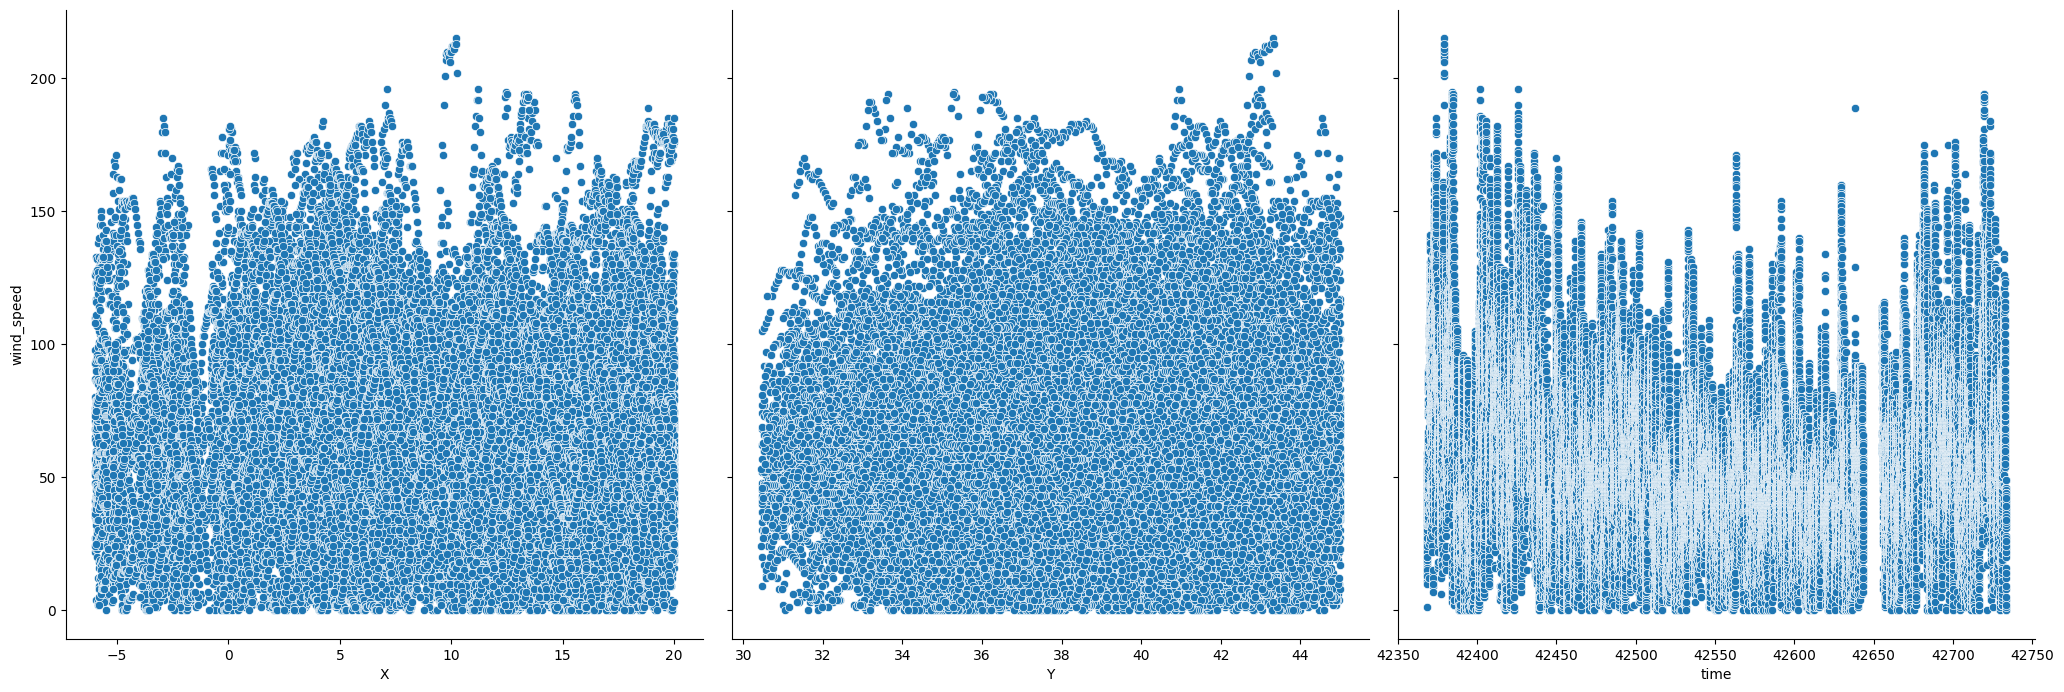

In [ ]:
sns.pairplot(ws_df, x_vars=['X', 'Y', 'time'], y_vars='wind_speed', height=7, aspect=1, diag_kind=None)

In [ ]:
x=ws_df[['X', 'Y', 'time']]

y=ws_df['wind_speed']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54375, 3)
(18126, 3)
(54375,)
(18126,)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y.values.ravel())


KNeighborsClassifier(n_neighbors=1)

In [ ]:
check_coord=[[11.9, 33.16998, 42368.149155]]
print(knn.predict(check_coord))

[50.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred=knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

1.0


In [ ]:
ws_df.loc[(ws_df['X']== 23.1) & (ws_df['Y']==79.9)]

,X,Y,time,wind_speed,Time_Analysis


In [ ]:
from datetime import datetime

timestamp = 1627114850
#convert timestamp to datetime object
curr_time = datetime.fromtimestamp(timestamp)

print("Current Time:", curr_time)

Current Time: 2021-07-24 08:20:50


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x,y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [ ]:
new_coord = [[23.1, 79.9, 1627114850]]
print(knn.predict(new_coord))

[26.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

1.0


In [ ]:

# Testing with Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(x,y.values.ravel())
predicted= model.predict([[11.79, 33.169998, 42368.149155]])
print("Predicted Value:", predicted)

Predicted Value: [72.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = model.predict(x)
print(metrics.accuracy_score(y,y_pred))

0.017930787161556393


In [ ]:

# Which value of K should be used?

k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.16103939093015557, 0.14608849166942514, 0.12368972746331237, 0.11414542645922983, 0.10978704623193203, 0.10719408584353966, 0.10449078671521571, 0.10084960829747325, 0.09671190555003861, 0.09290521902239876, 0.09069844422376697, 0.08816065320534039, 0.08534701533708484, 0.08341608738828203, 0.08176100628930817, 0.07966457023060797, 0.07767847291183935, 0.07569237559307072, 0.07320975394460995, 0.07282356835484939, 0.07111331788590974, 0.06912722056714113, 0.06747213946816727, 0.06708595387840671, 0.066203243958954]


In [ ]:
print(metrics.accuracy_score(y_test, y_pred).mean())

0.066203243958954


Text(0, 0.5, 'Testing Accuracy')

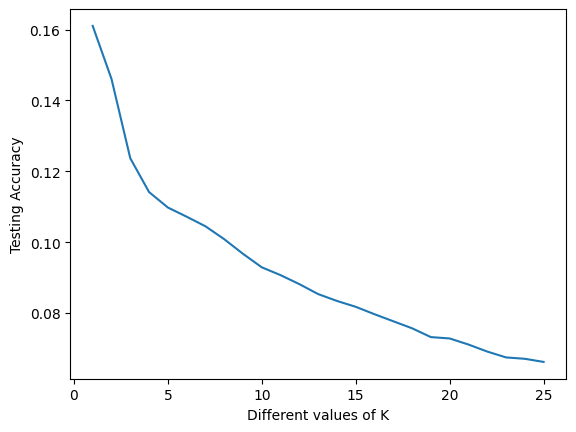

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Different values of K')
plt.ylabel('Testing Accuracy')

In [ ]:
# It can be seen that as the no. of neighbors increases, testing accuracy decreases.